In [156]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp2d, interp1d
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from copy import copy, deepcopy
import pyMelt
from pyMelt import phaseDiagramTools
import pickle
plt.style.use('seaborn-paper')
params = {'text.usetex': False, 'mathtext.fontset': 'stixsans',
          'xtick.labelsize':10, 'ytick.labelsize':10, 'axes.labelsize':10,
          'xtick.direction':'in','ytick.direction':'in','figure.figsize':(6,4),
          'xtick.top':True,'ytick.right':True}
plt.rcParams.update(params)

In [2]:
f = open('thermocalc_klb1.p', 'rb')
klb1_phasediag = pickle.load(f)
f.close()

f = open('thermocalc_kg1.p', 'rb')
kg1_phasediag = pickle.load(f)
f.close()

f = open('melts_klb1.p', 'rb')
klb1_melts_phasediag = pickle.load(f)
f.close()

In [109]:
inv = pyMelt.chemistry.invmelSpecies('t', 1, 1, 1, 1, 1, 1, 1)

In [110]:
def invmel_props(P, F, species):
    solidusmins = species.mineralProportions(P, 1000.0)
    props = np.zeros(6)
    props[0] = solidusmins['olv']
    props[1] = solidusmins['opx']
    if F > species.cpxExhaustion:
        props[2] = 0.0
    else:
        props[2] = solidusmins['cpx']*(species.cpxExhaustion - F)/species.cpxExhaustion
        
    if F > species.cpxExhaustion:
        props[3] = 0.0
    else:
        props[3] = solidusmins['grt']*(species.cpxExhaustion - F)/species.cpxExhaustion
    
    if F > species.cpxExhaustion:
        props[4] = 0.0
    else:
        props[4] = solidusmins['spn']*(species.cpxExhaustion - F)/species.cpxExhaustion
    
    if F > species.cpxExhaustion:
        props[5] = 0.0
    else:
        props[5] = solidusmins['plg']*(species.cpxExhaustion - F)/species.cpxExhaustion   
    
    propstot = np.sum(props)
    factor = propstot/(1-F)
    return {'ol': props[0]/factor,
            'opx': props[1]/factor,
            'cpx': props[2]/factor,
            'g': props[3]/factor,
            'spn': props[4]/factor,
            'pl': props[5]/factor,}

## Pure lherzolite comparisons

In [319]:
lz = pyMelt.lithologies.matthews.klb1()
mantle = pyMelt.mantle([lz], [1.0], ['lz'])
col1480 = mantle.adiabaticMelt(1480.0)
col1390 = mantle.adiabaticMelt(1390.0)
col1300 = mantle.adiabaticMelt(1300.0)
col1480_invmel = deepcopy(col1480)
col1390_invmel = deepcopy(col1390)
col1300_invmel = deepcopy(col1300)
col1480_melts = deepcopy(col1480)
col1390_melts = deepcopy(col1390)
col1300_melts = deepcopy(col1300)
col1480_tc = deepcopy(col1480)
col1390_tc = deepcopy(col1390)
col1300_tc = deepcopy(col1300)
col1480_melts_var = deepcopy(col1480)
col1390_melts_var = deepcopy(col1390)
col1300_melts_var = deepcopy(col1300)
col1480_tc_var = deepcopy(col1480)
col1390_tc_var = deepcopy(col1390)
col1300_tc_var = deepcopy(col1300)

### Thermocalc with constant partition coefficients

In [320]:
col1300_tc.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_phasediag,
                              olv_D=pyMelt.chemistry.olv_D, 
                              cpx_D=pyMelt.chemistry.cpx_D, 
                              opx_D=pyMelt.chemistry.opx_D, 
                              spn_D=pyMelt.chemistry.spn_D, 
                              grt_D=pyMelt.chemistry.grt_D, 
                              plg_D=pyMelt.chemistry.plg_D,
                              porosity=0.0)

col1390_tc.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_phasediag,
                              olv_D=pyMelt.chemistry.olv_D, 
                              cpx_D=pyMelt.chemistry.cpx_D, 
                              opx_D=pyMelt.chemistry.opx_D, 
                              spn_D=pyMelt.chemistry.spn_D, 
                              grt_D=pyMelt.chemistry.grt_D, 
                              plg_D=pyMelt.chemistry.plg_D,
                              porosity=0.0)

col1480_tc.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_phasediag,
                              olv_D=pyMelt.chemistry.olv_D, 
                              cpx_D=pyMelt.chemistry.cpx_D, 
                              opx_D=pyMelt.chemistry.opx_D, 
                              spn_D=pyMelt.chemistry.spn_D, 
                              grt_D=pyMelt.chemistry.grt_D, 
                              plg_D=pyMelt.chemistry.plg_D,
                              porosity=0.0)

Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).


### Thermocalc with variable partition coefficients

In [321]:
col1300_tc_var.calculateChemistry(method='phase_diagram_trace', 
                                  phaseDiagram=klb1_phasediag,
                                  z = pyMelt.chemistry.ionic_charge,
                                  olv_D = pyMelt.chemistry.olv_D,
                                  cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                  opx_D = pyMelt.chemistry.opx_D,
                                  spn_D = pyMelt.chemistry.spn_D,
                                  grt_D = pyMelt.chemistry.lattice_grt_D,
                                  plg_D = pyMelt.chemistry.lattice_plg_D,
                                  porosity = 0.0,
                                  ri = pyMelt.chemistry.ionic_radii,
                                  cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                  cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                  cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                  grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                  grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                  grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                  plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                  plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                  plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                 )

col1390_tc_var.calculateChemistry(method='phase_diagram_trace', 
                                  phaseDiagram=klb1_phasediag,
                                  z = pyMelt.chemistry.ionic_charge,
                                  olv_D = pyMelt.chemistry.olv_D,
                                  cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                  opx_D = pyMelt.chemistry.opx_D,
                                  spn_D = pyMelt.chemistry.spn_D,
                                  grt_D = pyMelt.chemistry.lattice_grt_D,
                                  plg_D = pyMelt.chemistry.lattice_plg_D,
                                  porosity = 0.0,
                                  ri = pyMelt.chemistry.ionic_radii,
                                  cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                  cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                  cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                  grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                  grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                  grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                  plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                  plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                  plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                 )

col1480_tc_var.calculateChemistry(method='phase_diagram_trace', 
                                  phaseDiagram=klb1_phasediag,
                                  z = pyMelt.chemistry.ionic_charge,
                                  olv_D = pyMelt.chemistry.olv_D,
                                  cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                  opx_D = pyMelt.chemistry.opx_D,
                                  spn_D = pyMelt.chemistry.spn_D,
                                  grt_D = pyMelt.chemistry.lattice_grt_D,
                                  plg_D = pyMelt.chemistry.lattice_plg_D,
                                  porosity = 0.0,
                                  ri = pyMelt.chemistry.ionic_radii,
                                  cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                  cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                  cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                  grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                  grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                  grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                  plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                  plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                  plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                 )

Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).


### INVMEL with constant partition coefficients

In [322]:
col1300_invmel.calculateChemistry()
col1390_invmel.calculateChemistry()
col1480_invmel.calculateChemistry()

Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).


### MELTS with constant partition coefficients

In [323]:
col1300_melts.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_melts_phasediag,
                                 olv_D=pyMelt.chemistry.olv_D, 
                                 cpx_D=pyMelt.chemistry.cpx_D, 
                                 opx_D=pyMelt.chemistry.opx_D, 
                                 spn_D=pyMelt.chemistry.spn_D, 
                                 grt_D=pyMelt.chemistry.grt_D, 
                                 plg_D=pyMelt.chemistry.plg_D,
                                 porosity=0.0)

col1390_melts.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_melts_phasediag,
                                 olv_D=pyMelt.chemistry.olv_D, 
                                 cpx_D=pyMelt.chemistry.cpx_D, 
                                 opx_D=pyMelt.chemistry.opx_D, 
                                 spn_D=pyMelt.chemistry.spn_D, 
                                 grt_D=pyMelt.chemistry.grt_D, 
                                 plg_D=pyMelt.chemistry.plg_D,
                                 porosity=0.0)

col1480_melts.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_melts_phasediag,
                                 olv_D=pyMelt.chemistry.olv_D, 
                                 cpx_D=pyMelt.chemistry.cpx_D, 
                                 opx_D=pyMelt.chemistry.opx_D, 
                                 spn_D=pyMelt.chemistry.spn_D, 
                                 grt_D=pyMelt.chemistry.grt_D, 
                                 plg_D=pyMelt.chemistry.plg_D,
                                 porosity=0.0)

Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).


### MELTS with variable partition coefficients

In [324]:
col1300_melts_var.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_melts_phasediag,
                                     z = pyMelt.chemistry.ionic_charge,
                                     olv_D = pyMelt.chemistry.olv_D,
                                     cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                     opx_D = pyMelt.chemistry.opx_D,
                                     spn_D = pyMelt.chemistry.spn_D,
                                     grt_D = pyMelt.chemistry.lattice_grt_D,
                                     plg_D = pyMelt.chemistry.lattice_plg_D,
                                     porosity = 0.0,
                                     ri = pyMelt.chemistry.ionic_radii,
                                     cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                     cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                     cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                     grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                     grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                     grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                     plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                     plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                     plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                     )

col1390_melts_var.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_melts_phasediag,
                                     z = pyMelt.chemistry.ionic_charge,
                                     olv_D = pyMelt.chemistry.olv_D,
                                     cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                     opx_D = pyMelt.chemistry.opx_D,
                                     spn_D = pyMelt.chemistry.spn_D,
                                     grt_D = pyMelt.chemistry.lattice_grt_D,
                                     plg_D = pyMelt.chemistry.lattice_plg_D,
                                     porosity = 0.0,
                                     ri = pyMelt.chemistry.ionic_radii,
                                     cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                     cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                     cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                     grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                     grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                     grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                     plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                     plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                     plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                     )

col1480_melts_var.calculateChemistry(method='phase_diagram_trace', phaseDiagram=klb1_melts_phasediag,
                                     z = pyMelt.chemistry.ionic_charge,
                                     olv_D = pyMelt.chemistry.olv_D,
                                     cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                     opx_D = pyMelt.chemistry.opx_D,
                                     spn_D = pyMelt.chemistry.spn_D,
                                     grt_D = pyMelt.chemistry.lattice_grt_D,
                                     plg_D = pyMelt.chemistry.lattice_plg_D,
                                     porosity = 0.0,
                                     ri = pyMelt.chemistry.ionic_radii,
                                     cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                     cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                     cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                     grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                     grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                     grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                     plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                     plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                     plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                     )

Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).
Lithology composition is set to the depleted mantle of Workman & Hart (2005).


In [325]:
mor1300_tc = pyMelt.geosettings.spreadingCentre(col1300_tc)
mor1390_tc = pyMelt.geosettings.spreadingCentre(col1390_tc)
mor1480_tc = pyMelt.geosettings.spreadingCentre(col1480_tc)
mor1300_tc_var = pyMelt.geosettings.spreadingCentre(col1300_tc_var)
mor1390_tc_var = pyMelt.geosettings.spreadingCentre(col1390_tc_var)
mor1480_tc_var = pyMelt.geosettings.spreadingCentre(col1480_tc_var)
mor1300_invmel = pyMelt.geosettings.spreadingCentre(col1300_invmel)
mor1390_invmel = pyMelt.geosettings.spreadingCentre(col1390_invmel)
mor1480_invmel = pyMelt.geosettings.spreadingCentre(col1480_invmel)
mor1300_melts = pyMelt.geosettings.spreadingCentre(col1300_melts)
mor1390_melts = pyMelt.geosettings.spreadingCentre(col1390_melts)
mor1480_melts = pyMelt.geosettings.spreadingCentre(col1480_melts)
mor1300_melts_var = pyMelt.geosettings.spreadingCentre(col1300_melts_var)
mor1390_melts_var = pyMelt.geosettings.spreadingCentre(col1390_melts_var)
mor1480_melts_var = pyMelt.geosettings.spreadingCentre(col1480_melts_var)

In [327]:
phases = ['ol', 'cpx', 'opx', 'g', 'spn', 'pl']
lz_species = []

for ph in phases:
    lz_species.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ph+'_mass', klb1_phasediag, prefix='', suffix=''))

col1480_tc.calculateChemistry(species_objects={'lz':lz_species})
col1390_tc.calculateChemistry(species_objects={'lz':lz_species})
col1300_tc.calculateChemistry(species_objects={'lz':lz_species})


lz_species = []

for ph in phases:
    lz_species.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ph+'_mass', klb1_melts_phasediag, prefix='', suffix=''))

col1480_melts.calculateChemistry(species_objects={'lz':lz_species})
col1390_melts.calculateChemistry(species_objects={'lz':lz_species})
col1300_melts.calculateChemistry(species_objects={'lz':lz_species})

## Read in alphaMELTS results

In [26]:
alphahi = pd.read_csv('alpha_highT_phasemass.txt', skiprows=3, delimiter=' ')
alphahi['F'] = alphahi.mass.loc[0] - alphahi.mass
alphahi

,Pressure,Temperature,mass,liquid_0,olivine_0,garnet_0,orthopyroxene_0,clinopyroxene_0,spinel_0,Unnamed: 9,F
0,50000.0,1823.15,99.582001,0.486811,60.818975,11.755459,12.722822,13.797934,0.0,NaN,0.000000
1,49950.0,1823.05,99.582001,0.483557,60.822863,11.750359,12.719745,13.805476,0.0,NaN,0.000000
2,49900.0,1822.95,99.582001,0.480323,60.826730,11.745253,12.716683,13.813011,0.0,NaN,0.000000
3,49850.0,1822.85,99.582001,0.477109,60.830576,11.740140,12.713635,13.820541,0.0,NaN,0.000000
4,49800.0,1822.75,99.582001,0.473914,60.834400,11.735021,12.710601,13.828064,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
995,250.0,1605.67,74.107390,0.441951,60.546235,0.000000,13.119204,0.000000,0.0,NaN,25.474611
996,200.0,1605.26,74.035616,0.444981,60.594010,0.000000,12.996625,0.000000,0.0,NaN,25.546385
997,150.0,1604.83,73.960437,0.448337,60.644282,0.000000,12.867818,0.000000,0.0,NaN,25.621564
998,100.0,1604.38,73.881508,0.452048,60.697310,0.000000,12.732149,0.000000,0.0,NaN,25.700493


In [27]:
alphalo = pd.read_csv('alpha_lowT_phasemass.txt', skiprows=3, delimiter=' ')
alphalo['F'] = alphalo.mass.loc[0] - alphalo.mass
alphalo

,Pressure,Temperature,mass,liquid_0,olivine_0,garnet_0,orthopyroxene_0,clinopyroxene_0,spinel_0,Unnamed: 9,F
0,50000.0,1673.15,99.582001,0.000000,61.366291,12.033355,12.896987,13.285368,0.0,NaN,0.000000
1,49950.0,1673.05,99.582001,0.000000,61.366301,12.030296,12.899446,13.285958,0.0,NaN,0.000000
2,49900.0,1672.94,99.582001,0.000000,61.366312,12.027228,12.901910,13.286551,0.0,NaN,0.000000
3,49850.0,1672.84,99.582001,0.000000,61.366322,12.024152,12.904379,13.287147,0.0,NaN,0.000000
4,49800.0,1672.74,99.582001,0.000000,61.366333,12.021067,12.906853,13.287747,0.0,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
995,250.0,1505.04,80.577380,0.430720,66.854550,0.000000,12.877806,0.414304,0.0,NaN,19.004621
996,200.0,1504.85,80.549407,0.430335,66.873246,0.000000,12.859859,0.385967,0.0,NaN,19.032594
997,150.0,1504.66,80.521680,0.429964,66.891838,0.000000,12.842039,0.357840,0.0,NaN,19.060321
998,100.0,1504.47,80.494188,0.429605,66.910333,0.000000,12.824334,0.329916,0.0,NaN,19.087813


In [347]:
alphalo_maj = pd.read_csv('alphamelts/lowT/Liquid_comp_tbl.txt', delimiter=' |-', skiprows=3, engine='python')
alphalo_maj

alphalo_maj['Mg#'] = alphalo_maj.MgO / 40.3044 / ( alphalo_maj.MgO / 40.3044 + alphalo_maj.FeO / 71.844)

In [387]:
alphahi_maj = pd.read_csv('alphamelts/highT/Liquid_comp_tbl.txt', delimiter=' |-', skiprows=3, engine='python')
alphahi_maj

alphahi_maj['Mg#'] = alphahi_maj.MgO / 40.3044 / ( alphahi_maj.MgO / 40.3044 + alphahi_maj.FeO / 71.844)

In [348]:
alphalo_tra = pd.read_csv('alphamelts/lowT/traces.csv', skiprows=1)
alphalo_tra

,Pressure,Temperature,mass,Ni,Cr,Mn,Rb,Ba,Th,U,...,Eu,Ti,Gd,Tb,Dy,Ho,Y,Er,Yb,Lu
0,50000,1673.15,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49950,1673.05,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,49900,1672.94,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49850,1672.84,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49800,1672.74,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,250,1505.04,0.430720,243.320,7753.56,1282.74,1.610000e-15,1.630000e-14,1.030000e-15,2.060000e-15,...,0.012645,926.651,0.061374,0.022016,0.169165,0.051602,1.23891,0.159116,0.202454,0.032701
996,200,1504.85,0.430335,243.394,7768.48,1282.39,1.510000e-15,1.530000e-14,9.690000e-16,1.930000e-15,...,0.012376,921.968,0.060157,0.021644,0.166450,0.050859,1.21972,0.156898,0.200105,0.032345
997,150,1504.66,0.429964,243.468,7783.37,1282.04,1.420000e-15,1.440000e-14,9.080000e-16,1.810000e-15,...,0.012112,917.335,0.058961,0.021277,0.163770,0.050125,1.20078,0.154705,0.197782,0.031993
998,100,1504.47,0.429605,243.541,7798.22,1281.69,1.330000e-15,1.350000e-14,8.520000e-16,1.700000e-15,...,0.011852,912.748,0.057785,0.020914,0.161123,0.049399,1.18205,0.152536,0.195484,0.031646


In [351]:
alphahi_tra = pd.read_csv('alphamelts/highT/traces.csv', skiprows=1)
alphahi_tra

,Pressure,Temperature,mass,Ni,Cr,Mn,Rb,Ba,Th,U,...,Eu,Ti,Gd,Tb,Dy,Ho,Y,Er,Yb,Lu
0,50000,1823.15,0.486811,228.626,2699.53,1169.84,9.700900e+00,1.093580e+02,1.165900e+00,3.367100e-01,...,0.853367,4800.810,2.288280,0.293589,1.559280,0.250173,7.676060,0.592599,0.431134,0.064180
1,49950,1823.05,0.483557,228.605,2699.76,1170.02,9.762760e+00,1.100560e+02,1.171560e+00,3.378980e-01,...,0.853618,4802.070,2.289020,0.293686,1.559840,0.250266,7.678880,0.592828,0.431308,0.064206
2,49900,1822.95,0.480323,228.584,2699.99,1170.20,9.825040e+00,1.107580e+02,1.177230e+00,3.390860e-01,...,0.853867,4803.330,2.289750,0.293782,1.560400,0.250359,7.681700,0.593058,0.431482,0.064232
3,49850,1822.85,0.477109,228.563,2700.22,1170.38,9.887740e+00,1.114650e+02,1.182920e+00,3.402760e-01,...,0.854116,4804.580,2.290480,0.293879,1.560960,0.250453,7.684520,0.593288,0.431657,0.064259
4,49800,1822.75,0.473914,228.542,2700.45,1170.55,9.950850e+00,1.121770e+02,1.188630e+00,3.414680e-01,...,0.854364,4805.830,2.291200,0.293975,1.561510,0.250546,7.687350,0.593518,0.431832,0.064285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,250,1605.67,0.441951,262.167,7240.86,1213.10,2.240000e-22,1.800000e-21,2.300000e-22,1.580000e-21,...,0.000006,248.541,0.000057,0.000035,0.000507,0.000255,0.001091,0.001273,0.007938,0.002354
996,200,1605.26,0.444981,262.404,7258.89,1212.71,1.880000e-22,1.510000e-21,1.910000e-22,1.320000e-21,...,0.000006,243.232,0.000051,0.000032,0.000463,0.000234,0.000992,0.001176,0.007474,0.002234
997,150,1604.83,0.448337,262.653,7277.98,1212.30,1.570000e-22,1.260000e-21,1.580000e-22,1.090000e-21,...,0.000005,237.762,0.000046,0.000029,0.000421,0.000215,0.000897,0.001081,0.007015,0.002114
998,100,1604.38,0.452048,262.916,7298.24,1211.87,1.290000e-22,1.040000e-21,1.290000e-22,8.910000e-22,...,0.000004,232.119,0.000041,0.000026,0.000381,0.000195,0.000807,0.000990,0.006560,0.001994


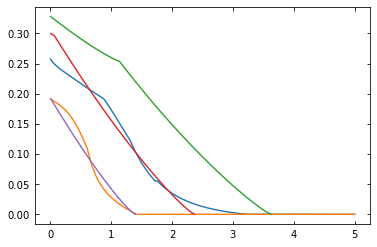

In [349]:
f, a = plt.subplots()

a.plot(alphahi.Pressure/1e4, alphahi.F/100)
a.plot(alphalo.Pressure/1e4, alphalo.F/100)


a.plot(col1480_tc.P, col1480_tc.F)
a.plot(col1390.P, col1390.F)
a.plot(col1300_tc.P, col1300_tc.F)



plt.show()

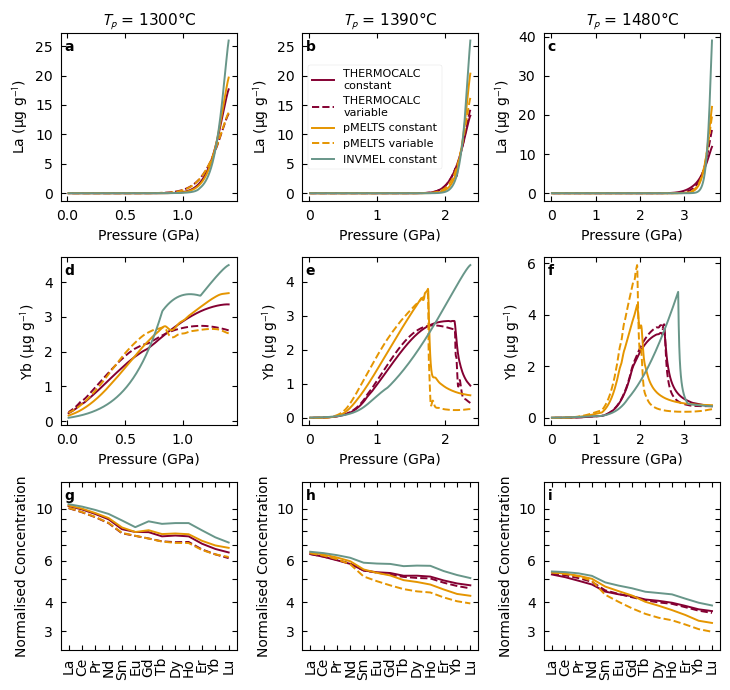

In [394]:
f, a = plt.subplots(3, 3, figsize=(7.4, 7.0), dpi=100)
a = np.ravel(a).tolist()

cols1300 = [col1300_tc, col1300_tc_var, col1300_melts, col1300_melts_var, col1300_invmel]
mors1300 = [mor1300_tc, mor1300_tc_var, mor1300_melts, mor1300_melts_var, mor1300_invmel]
labels1300 = ['THERMOCALC\nconstant', 'THERMOCALC\nvariable',
              'pMELTS constant', 'pMELTS variable',
              'INVMEL constant']
colours1300 = ['#840032', '#840032', '#E59500', '#E59500', '#689689']
ls1300 = ['-', '--', '-', '--', '-']
elements = ['La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Yb', 'Lu']

cols1390 = [col1390_tc, col1390_tc_var, col1390_melts, col1390_melts_var, col1390_invmel]
mors1390 = [mor1390_tc, mor1390_tc_var, mor1390_melts, mor1390_melts_var, mor1390_invmel]

cols1480 = [col1480_tc, col1480_tc_var, col1480_melts, col1480_melts_var, col1480_invmel]
mors1480 = [mor1480_tc, mor1480_tc_var, mor1480_melts, mor1480_melts_var, mor1480_invmel]
colours1480 = colours1300
ls1480 = ls1300

a[6].set_yscale('log')
a[7].set_yscale('log')
a[8].set_yscale('log')

for i, col in zip(range(len(cols1300)), cols1300):
    a[0].plot(col.P, col.lithologies['lz']['La'], c=colours1300[i], ls=ls1300[i], label=labels1300[i])
    a[3].plot(col.P, col.lithologies['lz']['Yb'], c=colours1300[i], ls=ls1300[i])

for i, mor in zip(range(len(mors1300)), mors1300):
    normed = []
    for el in elements:
        normed.append(mor.chemistry[el]/pyMelt.chemistry.workman05_dmm[el])
    a[6].plot(range(len(elements)), normed, c=colours1300[i], ls=ls1300[i])

# a[0].plot(alphalo.Pressure/1e4, alphalo_tra['La'], c='0.3', ls=':', label='alphaMELTS')
# a[3].plot(alphalo.Pressure/1e4, alphalo_tra['Yb'], c='0.3', ls=':', label='alphaMELTS')

# a[1].plot(alphahi.Pressure[alphahi.Pressure<2.5e4]/1e4, alphahi_tra[alphahi.Pressure<2.5e4]['La'], c='0.3', ls=':', label='alphaMELTS*')
# a[4].plot(alphahi.Pressure[alphahi.Pressure<2.5e4]/1e4, alphahi_tra[alphahi.Pressure<2.5e4]['Yb'], c='0.3', ls=':', label='alphaMELTS')
    
for i, col in zip(range(len(cols1390)), cols1390):
    a[1].plot(col.P, col.lithologies['lz']['La'], c=colours1300[i], ls=ls1300[i], label=labels1300[i])
    a[4].plot(col.P, col.lithologies['lz']['Yb'], c=colours1300[i], ls=ls1300[i])

for i, mor in zip(range(len(mors1390)), mors1390):
    normed = []
    for el in elements:
        normed.append(mor.chemistry[el]/pyMelt.chemistry.workman05_dmm[el])
    a[7].plot(range(len(elements)), normed, c=colours1300[i], ls=ls1300[i])

    
for i, col in zip(range(len(cols1480)), cols1480):
    a[2].plot(col.P, col.lithologies['lz']['La'], c=colours1480[i], ls=ls1480[i])
    a[5].plot(col.P, col.lithologies['lz']['Yb'], c=colours1480[i], ls=ls1480[i])

for i, mor in zip(range(len(mors1480)), mors1480):
    normed = []
    for el in elements:
        normed.append(mor.chemistry[el]/pyMelt.chemistry.workman05_dmm[el])
    a[8].plot(range(len(elements)), normed, c=colours1480[i], ls=ls1480[i])

for ax in [a[6], a[7], a[8]]:
    ax.set_xticks(range(len(elements)))
    ax.set_xticklabels(elements, rotation=90)
    ax.set_ylim(2.5, 13)
    ax.set_yticks([3,4,5,6,7,8,9,10])
    ax.set_yticklabels(['3','4','','6','','','','10'])
    ax.set_ylabel('Normalised Concentration')



a[1].legend(loc='center left')

for i in range(len(a)):
    a[i].text(0.02, 0.96, 'abcdefghijk'[i], transform=a[i].transAxes, fontweight='bold',
              va='top', ha='left', fontsize=10)

for ax in [a[0], a[1], a[2]]:
    ax.set_ylabel('La (µg g$^{-1}$)')
    ax.set_xlabel('Pressure (GPa)')

for ax in [a[3], a[4], a[5]]:
    ax.set_ylabel('Yb (µg g$^{-1}$)')
    ax.set_xlabel('Pressure (GPa)')


a[0].set_title('$T_p$ = 1300°C', fontsize=11)
a[1].set_title('$T_p$ = 1390°C', fontsize=11)
a[2].set_title('$T_p$ = 1480°C', fontsize=11)



f.tight_layout()
    
f.savefig('figures/lz_mantle_tes.pdf')
    
plt.show()

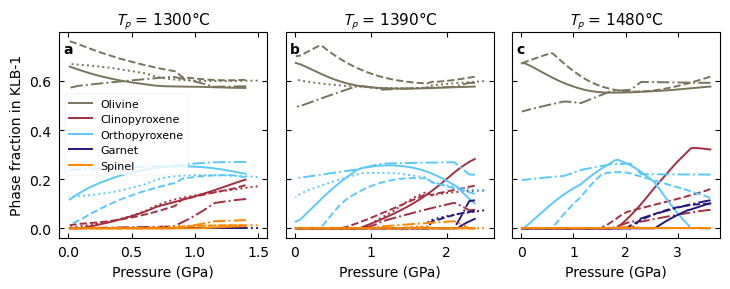

In [396]:
f, a = plt.subplots(1,3, figsize=(7.4, 3.0), dpi=100, sharex='col', sharey='row')

phases = ['ol', 'cpx', 'opx', 'g', 'spn']
labels = ['Olivine', 'Clinopyroxene', 'Orthopyroxene', 'Garnet', 'Spinel']
colours = ['#79745C',  '#A4303F', '#5CC8FF', '#27187E', '#FF8600', '#C7CEDB']
alphalabels = ['olivine_0', 'clinopyroxene_0', 'orthopyroxene_0', 'garnet_0', 'spinel_0']


for i in range(len(phases)):
    a[0].plot(col1300_tc.P, col1300_tc.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='-', label=labels[i])
    a[0].plot(col1300_tc.P, col1300_melts.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='--')
    a[0].plot(alphalo.Pressure[alphalo.Pressure<1.5e4]/1e4, alphalo[alphalabels[i]][alphalo.Pressure<1.5e4]/100, c=colours[i], ls=':')
    
    a[1].plot(col1390_tc.P, col1390_tc.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='-', label=labels[i])
    a[1].plot(col1390_tc.P, col1390_melts.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='--')
    a[1].plot(alphahi.Pressure[alphahi.Pressure<2.5e4]/1e4, alphahi[alphalabels[i]][alphahi.Pressure<2.5e4]/100, c=colours[i], ls=':')
    
    a[2].plot(col1480_tc.P, col1480_tc.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='-', label=phases[i])
    a[2].plot(col1480_tc.P, col1480_melts.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='--', label=phases[i])
    
    prop = []
    for p, ff in zip(col1300_tc.P, col1300_tc.lithologies['lz'].F):
        prop.append(invmel_props(p, ff, inv)[phases[i]])
    a[0].plot(col1300_tc.P, prop, c=colours[i], ls='-.')
    
    prop = []
    for p, ff in zip(col1390_tc.P, col1390_tc.lithologies['lz'].F):
        prop.append(invmel_props(p, ff, inv)[phases[i]])
    a[1].plot(col1390_tc.P, prop, c=colours[i], ls='-.')
    
    prop = []
    for p, ff in zip(col1480_tc.P, col1480_tc.lithologies['lz'].F):
        prop.append(invmel_props(p, ff, inv)[phases[i]])
    a[2].plot(col1480_tc.P, prop, c=colours[i], ls='-.')

a[0].legend()

a[0].set_ylabel('Phase fraction in KLB-1')


a[0].set_title('$T_p$ = 1300°C', fontsize=11)
a[1].set_title('$T_p$ = 1390°C', fontsize=11)
a[2].set_title('$T_p$ = 1480°C', fontsize=11)

for i in range(len(a)):
    a[i].text(0.02, 0.95, 'abcde'[i], fontweight='bold', transform=a[i].transAxes, va='top', ha='left', fontsize=10)
    a[i].set_xlabel('Pressure (GPa)')

f.tight_layout()

f.savefig('figures/lz_mantle_props.pdf')

plt.show()

## Lherzolite + Pyroxenite comparisons

In [363]:
lz = pyMelt.lithologies.matthews.klb1()
px = pyMelt.lithologies.matthews.kg1()
mantle = pyMelt.mantle([lz, px], [0.9, 0.1], ['lz', 'px'])
pxcol1480 = mantle.adiabaticMelt(1480.0)
pxcol1390 = mantle.adiabaticMelt(1390.0)
pxcol1300 = mantle.adiabaticMelt(1300.0)
pxcol1480_tc = deepcopy(pxcol1480)
pxcol1390_tc = deepcopy(pxcol1390)
pxcol1300_tc = deepcopy(pxcol1300)
pxcol1480_tc_var = deepcopy(pxcol1480)
pxcol1390_tc_var = deepcopy(pxcol1390)
pxcol1300_tc_var = deepcopy(pxcol1300)

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/pyMelt/mantle_class.py:490: UserWarning: Freezing prevented.
  _warn("Freezing prevented.")


In [364]:
phases = ['ol', 'cpx', 'opx', 'g', 'spn', 'pl']
lz_species = []
px_species = []

for ph in phases:
    lz_species.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ph+'_mass', klb1_phasediag, prefix='', suffix=''))
    px_species.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ph+'_mass', kg1_phasediag, prefix='', suffix=''))

pxcol1480.calculateChemistry(species_objects={'lz':lz_species, 'px':px_species})
pxcol1390.calculateChemistry(species_objects={'lz':lz_species, 'px':px_species})
pxcol1300.calculateChemistry(species_objects={'lz':lz_species, 'px':px_species})

### Thermocalc with constant partition coefficients

In [365]:
pxcol1300_tc.calculateChemistry(method='phase_diagram_trace', 
                                elements={'lz': pyMelt.chemistry.workman05_dmm, 
                                          'px': pyMelt.chemistry.stracke03_bsic},
                                phaseDiagram={'lz': klb1_phasediag, 'px': kg1_phasediag},
                                olv_D=pyMelt.chemistry.olv_D, 
                                cpx_D=pyMelt.chemistry.cpx_D, 
                                opx_D=pyMelt.chemistry.opx_D, 
                                spn_D=pyMelt.chemistry.spn_D, 
                                grt_D=pyMelt.chemistry.grt_D, 
                                plg_D=pyMelt.chemistry.plg_D,
                                porosity=0.005)

pxcol1390_tc.calculateChemistry(method='phase_diagram_trace', 
                                elements={'lz': pyMelt.chemistry.workman05_dmm, 
                                          'px': pyMelt.chemistry.stracke03_bsic},
                                phaseDiagram={'lz': klb1_phasediag, 'px': kg1_phasediag},
                                olv_D=pyMelt.chemistry.olv_D, 
                                cpx_D=pyMelt.chemistry.cpx_D, 
                                opx_D=pyMelt.chemistry.opx_D, 
                                spn_D=pyMelt.chemistry.spn_D, 
                                grt_D=pyMelt.chemistry.grt_D, 
                                plg_D=pyMelt.chemistry.plg_D,
                                porosity=0.005)

pxcol1480_tc.calculateChemistry(method='phase_diagram_trace', 
                                elements={'lz': pyMelt.chemistry.workman05_dmm, 
                                          'px': pyMelt.chemistry.stracke03_bsic},
                                phaseDiagram={'lz': klb1_phasediag, 'px': kg1_phasediag},
                                olv_D=pyMelt.chemistry.olv_D, 
                                cpx_D=pyMelt.chemistry.cpx_D, 
                                opx_D=pyMelt.chemistry.opx_D, 
                                spn_D=pyMelt.chemistry.spn_D, 
                                grt_D=pyMelt.chemistry.grt_D, 
                                plg_D=pyMelt.chemistry.plg_D,
                                porosity=0.005)

### Thermocalc with variable partition coefficients

In [366]:
pxcol1300_tc_var.calculateChemistry(method='phase_diagram_trace', 
                                    elements={'lz': pyMelt.chemistry.workman05_dmm, 
                                              'px': pyMelt.chemistry.stracke03_bsic},
                                    phaseDiagram={'lz': klb1_phasediag, 'px': kg1_phasediag},
                                    z = pyMelt.chemistry.ionic_charge,
                                    olv_D = pyMelt.chemistry.olv_D,
                                    cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                    opx_D = pyMelt.chemistry.opx_D,
                                    spn_D = pyMelt.chemistry.spn_D,
                                    grt_D = pyMelt.chemistry.lattice_grt_D,
                                    plg_D = pyMelt.chemistry.lattice_plg_D,
                                    porosity = 0.005,
                                    ri = pyMelt.chemistry.ionic_radii,
                                    cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                    cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                    cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                    grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                    grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                    grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                    plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                    plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                    plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                    )

pxcol1390_tc_var.calculateChemistry(method='phase_diagram_trace', 
                                    elements={'lz': pyMelt.chemistry.workman05_dmm, 
                                              'px': pyMelt.chemistry.stracke03_bsic},
                                    phaseDiagram={'lz': klb1_phasediag, 'px': kg1_phasediag},
                                    z = pyMelt.chemistry.ionic_charge,
                                    olv_D = pyMelt.chemistry.olv_D,
                                    cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                    opx_D = pyMelt.chemistry.opx_D,
                                    spn_D = pyMelt.chemistry.spn_D,
                                    grt_D = pyMelt.chemistry.lattice_grt_D,
                                    plg_D = pyMelt.chemistry.lattice_plg_D,
                                    porosity = 0.005,
                                    ri = pyMelt.chemistry.ionic_radii,
                                    cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                    cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                    cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                    grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                    grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                    grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                    plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                    plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                    plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                    )

pxcol1480_tc_var.calculateChemistry(method='phase_diagram_trace', 
                                    elements={'lz': pyMelt.chemistry.workman05_dmm, 
                                              'px': pyMelt.chemistry.stracke03_bsic},
                                    phaseDiagram={'lz': klb1_phasediag, 'px': kg1_phasediag},
                                    z = pyMelt.chemistry.ionic_charge,
                                    olv_D = pyMelt.chemistry.olv_D,
                                    cpx_D = pyMelt.chemistry.lattice_cpx_D,
                                    opx_D = pyMelt.chemistry.opx_D,
                                    spn_D = pyMelt.chemistry.spn_D,
                                    grt_D = pyMelt.chemistry.lattice_grt_D,
                                    plg_D = pyMelt.chemistry.lattice_plg_D,
                                    porosity = 0.005,
                                    ri = pyMelt.chemistry.ionic_radii,
                                    cpx_D0 = pyMelt.chemistry.lattice_cpx_D0,
                                    cpx_r0 = pyMelt.chemistry.lattice_cpx_r0,
                                    cpx_Em = pyMelt.chemistry.lattice_cpx_Em,
                                    grt_D0 = pyMelt.chemistry.lattice_grt_D0,
                                    grt_r0 = pyMelt.chemistry.lattice_grt_r0,
                                    grt_Em = pyMelt.chemistry.lattice_grt_Em,
                                    plg_D0 = pyMelt.chemistry.lattice_plg_D0,
                                    plg_r0 = pyMelt.chemistry.lattice_plg_r0,
                                    plg_Em = pyMelt.chemistry.lattice_plg_Em,
                                    )

In [367]:
pxmor1300_tc = pyMelt.geosettings.spreadingCentre(pxcol1300_tc)
pxmor1390_tc = pyMelt.geosettings.spreadingCentre(pxcol1390_tc)
pxmor1480_tc = pyMelt.geosettings.spreadingCentre(pxcol1480_tc)
pxmor1300_tc_var = pyMelt.geosettings.spreadingCentre(pxcol1300_tc_var)
pxmor1390_tc_var = pyMelt.geosettings.spreadingCentre(pxcol1390_tc_var)
pxmor1480_tc_var = pyMelt.geosettings.spreadingCentre(pxcol1480_tc_var)

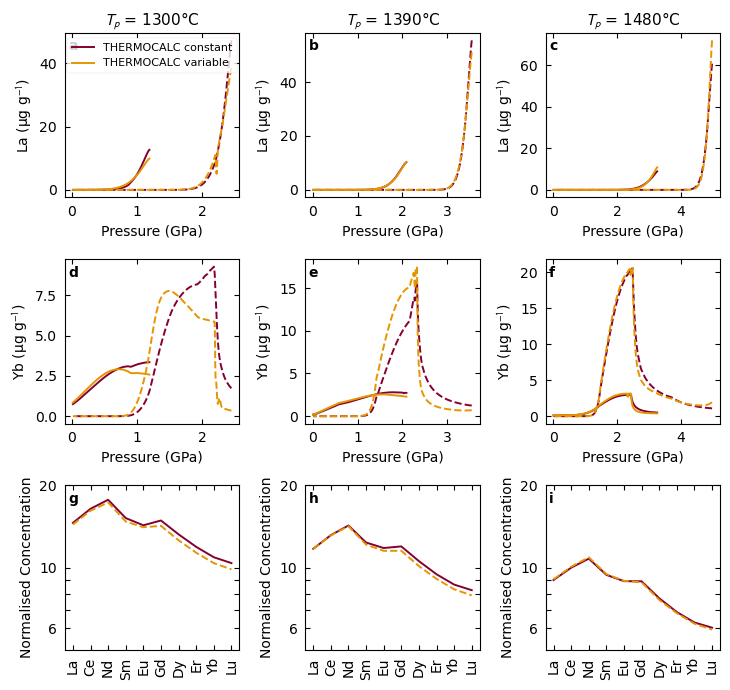

In [373]:
f, a = plt.subplots(3, 3, figsize=(7.4, 7), dpi=100)
a = np.ravel(a).tolist()

cols1300 = [pxcol1300_tc, pxcol1300_tc_var]
mors1300 = [pxmor1300_tc, pxmor1300_tc_var]
labels1300 = ['THERMOCALC constant', 'THERMOCALC variable',
              'pMELTS constant', 'pMELTS variable',
              'INVMEL constant']
colours1300 = ['#840032', '#E59500',]
ls1300 = ['-', '--', '-', '--', '-']
elements = ['La', 'Ce', 'Nd', 'Sm', 'Eu', 'Gd', 'Dy', 'Er', 'Yb', 'Lu']

cols1390 = [pxcol1390_tc, pxcol1390_tc_var]
mors1390 = [pxmor1390_tc, pxmor1390_tc_var]

cols1480 = [pxcol1480_tc, pxcol1480_tc_var]
mors1480 = [pxmor1480_tc, pxmor1480_tc_var]
colours1480 = colours1300
ls1480 = ls1300

for ax in [a[6], a[7], a[8]]:
    ax.set_yscale('log')
    ax.set_xticks(range(len(elements)))
    ax.set_xticklabels(elements, rotation=90)
    ax.set_ylim(5, 20)
    ax.set_ylabel('Normalised Concentration')
    ax.set_yticks([6,7,8,9,10,20])
    ax.set_yticklabels(['6','','','','10','20'])



for i, col in zip(range(len(cols1300)), cols1300):
    a[0].plot(col.P, col.lithologies['lz']['La'], c=colours1300[i], ls='-', label=labels1300[i])
    a[3].plot(col.P, col.lithologies['lz']['Yb'], c=colours1300[i], ls='-')
    a[0].plot(col.P, col.lithologies['px']['La'], c=colours1300[i], ls='--')
    a[3].plot(col.P, col.lithologies['px']['Yb'], c=colours1300[i], ls='--')

for i, mor in zip(range(len(mors1300)), mors1300):
    normed = []
    for el in elements:
        normed.append(mor.chemistry[el]/pyMelt.chemistry.workman05_dmm[el])
    a[6].plot(range(len(elements)), normed, c=colours1300[i], ls=ls1300[i])

for i, col in zip(range(len(cols1390)), cols1390):
    a[1].plot(col.P, col.lithologies['lz']['La'], c=colours1300[i], ls='-', label=labels1300[i])
    a[4].plot(col.P, col.lithologies['lz']['Yb'], c=colours1300[i], ls='-')
    a[1].plot(col.P, col.lithologies['px']['La'], c=colours1300[i], ls='--')
    a[4].plot(col.P, col.lithologies['px']['Yb'], c=colours1300[i], ls='--')

for i, mor in zip(range(len(mors1390)), mors1390):
    normed = []
    for el in elements:
        normed.append(mor.chemistry[el]/pyMelt.chemistry.workman05_dmm[el])
    a[7].plot(range(len(elements)), normed, c=colours1300[i], ls=ls1300[i])


for i, col in zip(range(len(cols1480)), cols1480):
    a[2].plot(col.P, col.lithologies['lz']['La'], c=colours1480[i], ls='-')
    a[5].plot(col.P, col.lithologies['lz']['Yb'], c=colours1480[i], ls='-')
    a[2].plot(col.P, col.lithologies['px']['La'], c=colours1480[i], ls='--')
    a[5].plot(col.P, col.lithologies['px']['Yb'], c=colours1480[i], ls='--')

for i, mor in zip(range(len(mors1480)), mors1480):
    normed = []
    for el in elements:
        normed.append(mor.chemistry[el]/pyMelt.chemistry.workman05_dmm[el])
    a[8].plot(range(len(elements)), normed, c=colours1480[i], ls=ls1480[i])
    

a[0].legend(loc='upper center')

for i in range(len(a)):
    a[i].text(0.02, 0.96, 'abcdefghijk'[i], transform=a[i].transAxes, fontweight='bold',
              va='top', ha='left', fontsize=10)

for ax in [a[0], a[1], a[2]]:
    ax.set_ylabel('La (µg g$^{-1}$)')
    ax.set_xlabel('Pressure (GPa)')

for ax in [a[3], a[4], a[5]]:
    ax.set_ylabel('Yb (µg g$^{-1}$)')
    ax.set_xlabel('Pressure (GPa)')


a[0].set_title('$T_p$ = 1300°C', fontsize=11)
a[1].set_title('$T_p$ = 1390°C', fontsize=11)
a[2].set_title('$T_p$ = 1480°C', fontsize=11)



f.tight_layout()

f.savefig('figures/lzpx_mantle_tes.pdf')
    
plt.show()

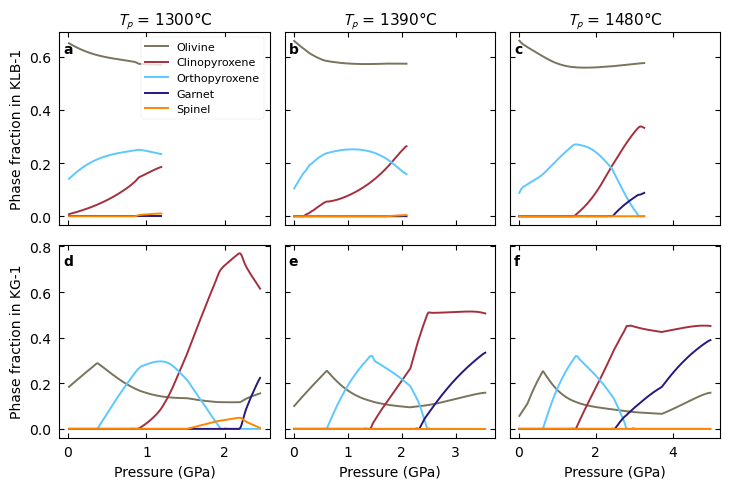

In [377]:
f, a = plt.subplots(2,3, figsize=(7.4, 5), dpi=100, sharex='col', sharey='row')

a = np.ravel(a).tolist()

phases = ['ol', 'cpx', 'opx', 'g', 'spn']
labels = ['Olivine', 'Clinopyroxene', 'Orthopyroxene', 'Garnet', 'Spinel']
colours = ['#79745C',  '#A4303F', '#5CC8FF', '#27187E', '#FF8600', '#C7CEDB']

for i in range(len(phases)):
    a[0].plot(pxcol1300.P, pxcol1300.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='-', label=labels[i])
    a[3].plot(pxcol1300.P, pxcol1300.lithologies['px'][phases[i]+'_mass'], c=colours[i], ls='-')
    
    a[1].plot(pxcol1390.P, pxcol1390.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='-', label=labels[i])
    a[4].plot(pxcol1390.P, pxcol1390.lithologies['px'][phases[i]+'_mass'], c=colours[i], ls='-')
    
    a[2].plot(pxcol1480.P, pxcol1480.lithologies['lz'][phases[i]+'_mass'], c=colours[i], ls='-', label=phases[i])
    a[5].plot(pxcol1480.P, pxcol1480.lithologies['px'][phases[i]+'_mass'], c=colours[i], ls='-')

a[0].legend()

a[0].set_ylabel('Phase fraction in KLB-1')
a[3].set_ylabel('Phase fraction in KG-1')
for ax in [a[3], a[4], a[5]]:
    ax.set_xlabel('Pressure (GPa)')

a[0].set_title('$T_p$ = 1300°C', fontsize=11)
a[1].set_title('$T_p$ = 1390°C', fontsize=11)
a[2].set_title('$T_p$ = 1480°C', fontsize=11)

for i in range(len(a)):
    a[i].text(0.02, 0.95, 'abcdefg'[i], fontweight='bold', transform=a[i].transAxes, va='top', ha='left', fontsize=10)


f.tight_layout()

f.savefig('figures/lzpx_mantle_props.pdf')

plt.show()

## Calculate INVMEL phase proportions:

In [23]:
inv = pyMelt.chemistry.invmelSpecies('t', 1, 1, 1, 1, 1, 1, 1)

In [24]:
inv.mineralProportions(1.0, 1400.0)

olv    0.605242
opx    0.266712
cpx    0.068742
grt    0.000000
spn    0.017500
plg    0.041803
dtype: float64

In [25]:
def invmel_props(P, F, species):
    solidusmins = species.mineralProportions(P, 1000.0)
    props = np.zeros(6)
    props[0] = solidusmins['olv']
    props[1] = solidusmins['opx']
    if F > species.cpxExhaustion:
        props[2] = 0.0
    else:
        props[2] = solidusmins['cpx']*(species.cpxExhaustion - F)/species.cpxExhaustion
        
    if F > species.cpxExhaustion:
        props[3] = 0.0
    else:
        props[3] = solidusmins['grt']*(species.cpxExhaustion - F)/species.cpxExhaustion
    
    if F > species.cpxExhaustion:
        props[4] = 0.0
    else:
        props[4] = solidusmins['spn']*(species.cpxExhaustion - F)/species.cpxExhaustion
    
    if F > species.cpxExhaustion:
        props[5] = 0.0
    else:
        props[5] = solidusmins['plg']*(species.cpxExhaustion - F)/species.cpxExhaustion   
    
    propstot = np.sum(props)
    factor = propstot/(1-F)
    return {'ol': props[0]/factor,
            'opx': props[1]/factor,
            'cpx': props[2]/factor,
            'g': props[3]/factor,
            'spn': props[4]/factor,
            'pl': props[5]/factor,}

## Phase diagram comparisons

/Users/simonmatthews/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


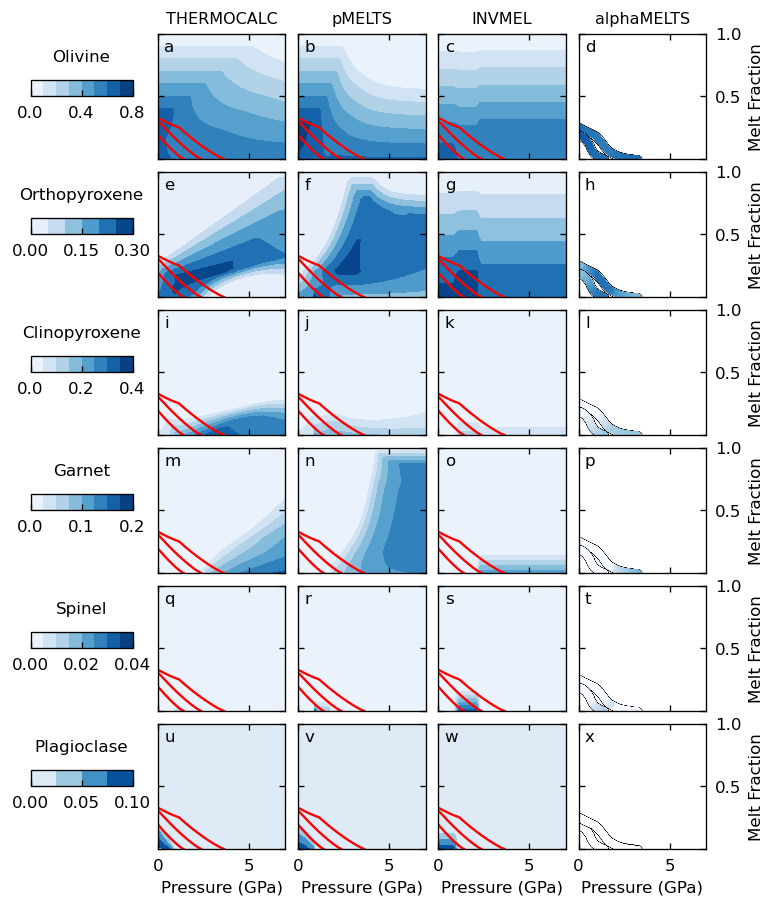

In [382]:
p = np.linspace(0, 7, 100)
f = np.linspace(0, 1, 100)

pp, ff = np.meshgrid(p, f)
cc = np.zeros(np.shape(pp))
invgrid = np.zeros([6, np.shape(pp)[0], np.shape(pp)[1]])

pds = [klb1_phasediag, klb1_melts_phasediag]
col_labels = ['THERMOCALC', 'pMELTS', 'INVMEL', 'alphaMELTS']
phs = ['ol', 'opx', 'cpx', 'g', 'spn', 'pl']
phs_labels = ['Olivine', 'Orthopyroxene', 'Clinopyroxene', 'Garnet', 'Spinel', 'Plagioclase']
alpha_phases = ['olivine_0', 'orthopyroxene_0', 'clinopyroxene_0', 'garnet_0', 'spinel_0']
levels = [[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
          [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
          [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
          [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2],
          [0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04],
          [0.0, 0.025, 0.05, 0.075, 0.1]]



f,a = plt.subplots(6, 5, figsize=(7.4,9), sharex='col', dpi=120)

f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

for ax in a[:,0]:
    ax.axis("off")

for k in range(np.shape(pp)[0]):
    for l in range(np.shape(pp)[1]):
        props = invmel_props(pp[k, l], ff[k, l], inv)
        invgrid[:, k, l] = [props['ol'], props['opx'], props['cpx'], props['g'], props['spn'], props['pl']]

cbax = []
cbars = []

for i in range(len(phs)):
    # cbax.append(f.add_axes([0.78, 0.85-0.13*i, 0.12, 0.015]))
    pos = a[i,0].get_position().get_points()
    cbax.append(f.add_axes([pos[0,0]+0.1*(pos[1,0]-pos[0,0]), pos[0,1] + 0.5*(pos[1,1]-pos[0,1]), 
                            0.8*(pos[1,0]-pos[0,0]), 0.015]))




for i in range(len(pds)):
    for j in range(len(phs)):
        
        for k in range(np.shape(pp)[0]):
            for l in range(np.shape(pp)[1]):
                state = pd.Series({'P': pp[k,l],'F': ff[k,l]})
                cc[k,l] = pds[i](phs[j] + '_mass', state)
                
        cs = a[j,i+1].contourf(pp, ff, cc, cmap=plt.cm.Blues, levels=levels[j])
        
        if i==0:
            cbars.append(plt.colorbar(cs, cax=cbax[j], orientation='horizontal'))
            cbax[j].set_xticks([0, levels[j][-1]/2, levels[j][-1]])

for i in range(len(phs)):
    a[i,3].contourf(pp, ff, invgrid[i,:,:], cmap=plt.cm.Blues, levels=levels[i])
        
for i in range(len(phs)):
    a[i, 0].text(0.5, 0.75, phs_labels[i], transform=a[i, 0].transAxes,
                  va='bottom', ha='center')

for i in range(len(col_labels)):
    a[0, i+1].set_title(col_labels[i])
    
for i in range(np.shape(a)[0]):
    for j in range(np.shape(a)[1]-1):
        a[i,j+1].text(0.05, 0.95, 'abcdefghijklmnopqrstuvwxyz'[i*(np.shape(a)[1]-1)+j],
                    transform=a[i,j+1].transAxes, ha='left', va='top')
        
        a[i, j+1].set_yticks([0.0, 0.5, 1.0])
        a[i, j+1].set_yticklabels(['']*3)

for ax in a[:, -1]:
    ax.yaxis.tick_right()
    ax.yaxis.set_ticks_position('both')
    ax.set_yticks([0, 0.5, 1.0])
    ax.set_yticklabels(['', '0.5', '1.0'])
    ax.yaxis.set_label_position("right")
    ax.set_ylabel('Melt Fraction')

for ax in a[-1,1:]:
    ax.set_xlabel('Pressure (GPa)')
    
for i in range(np.shape(a)[1]-2):
    for j in range(len(phs)):
        a[j,i+1].plot(col1300.P, col1300.lithologies['lz'].F, c='r')
        a[j,i+1].plot(col1390.P, col1390.lithologies['lz'].F, c='r')
        a[j,i+1].plot(col1480.P, col1480.lithologies['lz'].F, c='r')

for i in range(len(alpha_phases)):
    a[i, 4].scatter(alphahi[alphahi.F>0].Pressure/10000, alphahi.F[alphahi.F>0]/100, 
                    s=15, lw=1, edgecolor='k')
    a[i, 4].scatter(alphahi[alphahi.F>0].Pressure/10000, alphahi.F[alphahi.F>0]/100, 
                    s=15, c='w')
    a[i, 4].scatter(alphahi[alphahi.F>0].Pressure/10000, alphahi.F[alphahi.F>0]/100, 
                    c=alphahi[alpha_phases[i]][alphahi.F>0]/100,
                    cmap=plt.cm.Blues, vmin=levels[i][0], vmax=levels[i][-1],
                    s=15)
    
    a[i, 4].scatter(alphalo[alphalo.F>0].Pressure/10000, alphalo.F[alphalo.F>0]/100, 
                    s=15, lw=1, edgecolor='k')
    a[i, 4].scatter(alphalo[alphalo.F>0].Pressure/10000, alphalo.F[alphalo.F>0]/100, 
                    s=15, c='w')
    a[i, 4].scatter(alphalo[alphalo.F>0].Pressure/10000, alphalo.F[alphalo.F>0]/100, 
                    c=alphalo[alpha_phases[i]][alphalo.F>0]/100,
                    cmap=plt.cm.Blues, vmin=levels[i][0], vmax=levels[i][-1],
                    s=15)

    a[i, 4].set_xlim(0,7)
    a[i, 4].set_ylim(0,1)

    
a[5, 4].scatter(alphalo[alphalo.F>0].Pressure/10000, alphalo.F[alphalo.F>0]/100, 
                s=15, lw=1, edgecolor='k')
a[5, 4].scatter(alphalo[alphalo.F>0].Pressure/10000, alphalo.F[alphalo.F>0]/100, 
                s=15, c='w')
a[5, 4].scatter(alphahi[alphahi.F>0].Pressure/10000, alphahi.F[alphahi.F>0]/100, 
                s=15, lw=1, edgecolor='k')
a[5, 4].scatter(alphahi[alphahi.F>0].Pressure/10000, alphahi.F[alphahi.F>0]/100, 
                s=15, c='w')

a[5, 4].set_xlim(0,7)
a[5, 4].set_ylim(0,1)
    
a[-1, 4].set_ylim(0,1)
f.savefig('lherz_pseudo_comparison.pdf')

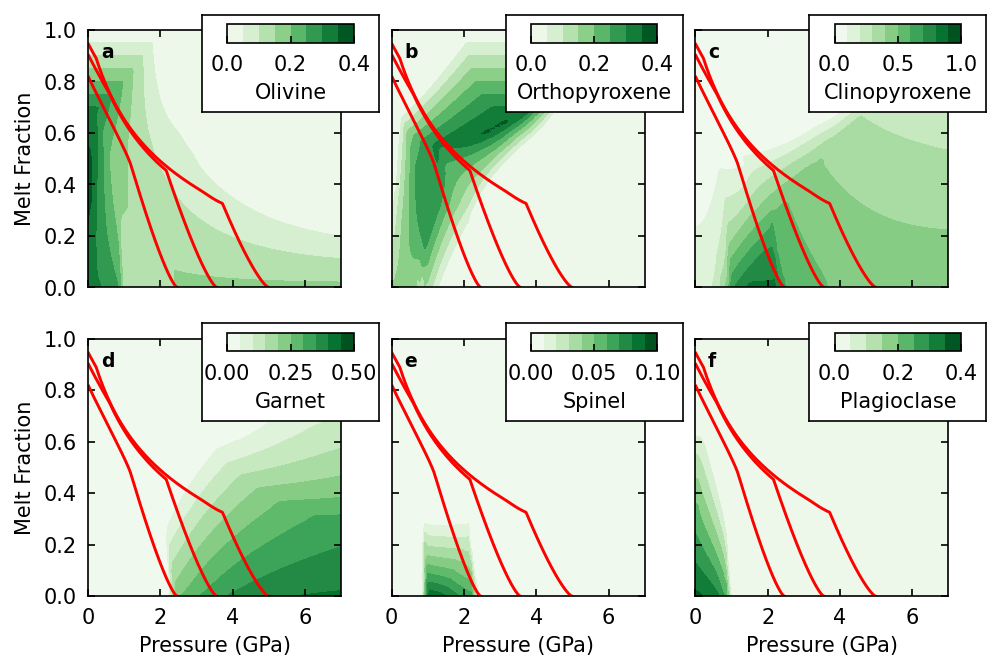

In [395]:
phases = ['ol', 'opx', 'cpx', 'g', 'spn', 'pl']
labels = ['Olivine', 'Orthopyroxene', 'Clinopyroxene', 'Garnet', 'Spinel', 'Plagioclase']
p = np.linspace(0, 7, 100)
f = np.linspace(0, 1, 100)

levels = [[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
          [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
          [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
          [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
          [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
          [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]]

pp, ff = np.meshgrid(p, f)

cc = np.zeros(np.shape(pp))

f, a = plt.subplots(2, 3, dpi=150, figsize=[7.4, 5], sharex='col', sharey='row')
a = np.ravel(a).tolist()

cbax = []
cbars = []

for i in range(len(phases)):
    # cbax.append(f.add_axes([0.78, 0.85-0.13*i, 0.12, 0.015]))
    pos = a[i].get_position().get_points()
    
    bgax = f.add_axes([pos[0,0]+0.45*(pos[1,0]-pos[0,0]), 
                        pos[0,1] + 0.68*(pos[1,1]-pos[0,1]), 
                        0.7*(pos[1,0]-pos[0,0]), 
                        0.13])
    # bgax.spines['top'].set_visible(False)
    # bgax.spines['right'].set_visible(False)
    # bgax.spines['bottom'].set_visible(False)
    # bgax.spines['left'].set_visible(False)
    bgax.set_xticks([])
    bgax.set_yticks([])
    
    cbax.append(f.add_axes([pos[0,0]+0.55*(pos[1,0]-pos[0,0]), 
                            pos[0,1] + 0.95*(pos[1,1]-pos[0,1]), 
                            0.5*(pos[1,0]-pos[0,0]), 
                            0.025]))
    
#     rect = patches.Rectangle((3.5, 0.8), 3.5, 0.2, facecolor='w', zorder=10)

#     a[i].add_patch(rect)

for n in range(len(phases)):
    for i in range(np.shape(pp)[0]):
        for j in range(np.shape(pp)[1]):
            state = pd.Series({'P': pp[i,j],'F': ff[i,j]})
            cc[i,j] = kg1_phasediag(phases[n] + '_mass', state)
    
    cs = a[n].contourf(pp, ff, cc, cmap=plt.cm.Greens, levels=levels[n], zorder=0)
    # a[n].text(0.05, 0.95, phases[n], transform=a[n].transAxes, va='top', ha='left')
    
    cbars.append(plt.colorbar(cs, cax=cbax[n], orientation='horizontal', label=labels[n]))
    cbax[n].set_xticks([0, levels[n][-1]/2, levels[n][-1]])


for ax in [a[3], a[4], a[5]]:
    ax.set_xlabel('Pressure (GPa)')

for ax in [a[0], a[3]]:
    ax.set_ylabel('Melt Fraction')

for i in range(len(a)):
    a[i].text(0.05, 0.95, 'abcdefghijklmnopqrstuvwxyz'[i], fontweight='bold',
                transform=a[i].transAxes, ha='left', va='top', fontsize=9)

for i in range(np.shape(a)[0]):
    a[i].plot(pxcol1300.P, pxcol1300.lithologies['px'].F, c='r')
    a[i].plot(pxcol1390.P, pxcol1390.lithologies['px'].F, c='r')
    a[i].plot(pxcol1480.P, pxcol1480.lithologies['px'].F, c='r')
    
# f.tight_layout()

f.savefig('figures/kg1_phasediag.pdf')
    
plt.show()

## Major elements comparison

In [386]:
species_objects = []
oxides = ['MgO', 'FeO', 'SiO2', 'Al2O3', 'CaO', 'TiO2', 'Na2O', 'Fe2O3']

for ox in oxides:
    species_objects.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ox, klb1_phasediag))

species_objects.append(pyMelt.chemistry.phaseDiagramMajorSpecies('Mg#', klb1_phasediag, suffix=''))

col1300_tc.calculateChemistry(species_objects={'lz':species_objects})
col1390_tc.calculateChemistry(species_objects={'lz':species_objects})
col1480_tc.calculateChemistry(species_objects={'lz':species_objects})

species_objects = []

for ox in oxides:
    species_objects.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ox, klb1_melts_phasediag))

species_objects.append(pyMelt.chemistry.phaseDiagramMajorSpecies('Mg#', klb1_melts_phasediag, suffix=''))
    
col1300_melts.calculateChemistry(species_objects={'lz':species_objects})
col1390_melts.calculateChemistry(species_objects={'lz':species_objects})
col1480_melts.calculateChemistry(species_objects={'lz':species_objects})




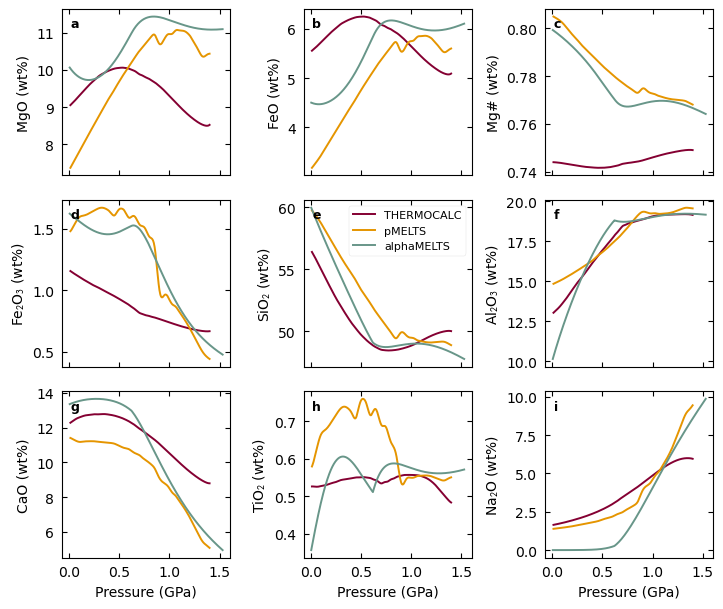

In [385]:
f, a = plt.subplots(3, 3, figsize=(7.4, 6.2), dpi=100, sharex='col')

a = np.ravel(a).tolist()

oxides = ['MgO', 'FeO', 'Mg#', 'Fe2O3', 'SiO2', 'Al2O3', 'CaO', 'TiO2', 'Na2O']


colours1300 = ['#840032', '#840032', '#E59500', '#E59500', '#689689']
oxide_labels = ['MgO', 'FeO', 'Mg#', 'Fe$_2$O$_3$', 'SiO$_2$', 'Al$_2$O$_3$', 'CaO', 'TiO$_2$', 'Na$_2$O']

for i in range(len(oxides)):
    a[i].plot(col1300_tc.P, col1300_tc.lithologies['lz'][oxides[i]], c='#840032', label='THERMOCALC')
    a[i].plot(col1300_melts.P, col1300_melts.lithologies['lz'][oxides[i]], c='#E59500', label='pMELTS')
    a[i].plot(alphalo_maj.Pressure/1e4, alphalo_maj[oxides[i]], c='#689689', label='alphaMELTS')
    a[i].set_ylabel(oxide_labels[i] + ' (wt%)')

for ax in [a[6], a[7], a[8]]:
    ax.set_xlabel('Pressure (GPa)')

f.tight_layout()
    
a[4].legend()

for i in range(len(a)):
    a[i].text(0.05, 0.95, 'abcdefghijklmnopqrstuvwxyz'[i], fontweight='bold',
                transform=a[i].transAxes, ha='left', va='top', fontsize=9)

f.savefig('figures/majors_lz1300.pdf')

plt.show()

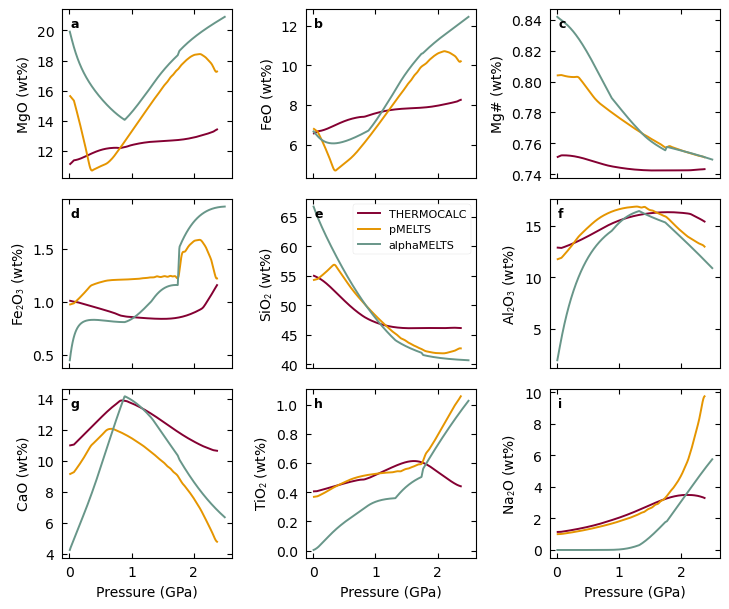

In [390]:
f, a = plt.subplots(3, 3, figsize=(7.4, 6.2), dpi=100, sharex='col')

a = np.ravel(a).tolist()

oxides = ['MgO', 'FeO', 'Mg#', 'Fe2O3', 'SiO2', 'Al2O3', 'CaO', 'TiO2', 'Na2O']



colours1300 = ['#840032', '#840032', '#E59500', '#E59500', '#689689']
oxide_labels = ['MgO', 'FeO', 'Mg#', 'Fe$_2$O$_3$', 'SiO$_2$', 'Al$_2$O$_3$', 'CaO', 'TiO$_2$', 'Na$_2$O']

for i in range(len(oxides)):
    a[i].plot(col1390_tc.P, col1390_tc.lithologies['lz'][oxides[i]], c='#840032', label='THERMOCALC')
    a[i].plot(col1390_melts.P, col1390_melts.lithologies['lz'][oxides[i]], c='#E59500', label='pMELTS')
    a[i].plot(alphahi_maj.Pressure[alphahi_maj.Pressure<2.5e4]/1e4, alphahi_maj[alphahi_maj.Pressure<2.5e4][oxides[i]], c='#689689', label='alphaMELTS')
    a[i].set_ylabel(oxide_labels[i] + ' (wt%)')

for ax in [a[6], a[7], a[8]]:
    ax.set_xlabel('Pressure (GPa)')

f.tight_layout()
    
a[4].legend()

for i in range(len(a)):
    a[i].text(0.05, 0.95, 'abcdefghijklmnopqrstuvwxyz'[i], fontweight='bold',
                transform=a[i].transAxes, ha='left', va='top', fontsize=9)

f.savefig('figures/majors_lz1390.pdf')

plt.show()

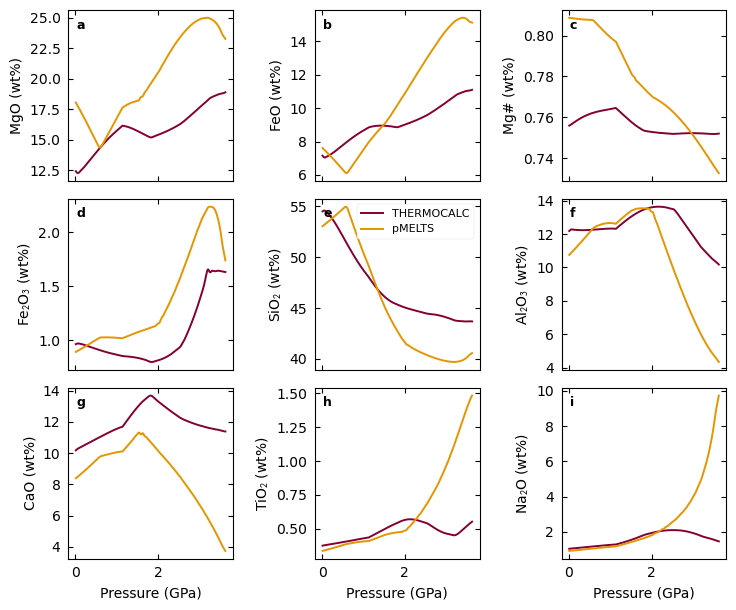

In [391]:
f, a = plt.subplots(3, 3, figsize=(7.4, 6.2), dpi=100, sharex='col')

a = np.ravel(a).tolist()

oxides = ['MgO', 'FeO', 'Mg#', 'Fe2O3', 'SiO2', 'Al2O3', 'CaO', 'TiO2', 'Na2O']



colours1300 = ['#840032', '#840032', '#E59500', '#E59500', '#689689']
oxide_labels = ['MgO', 'FeO', 'Mg#', 'Fe$_2$O$_3$', 'SiO$_2$', 'Al$_2$O$_3$', 'CaO', 'TiO$_2$', 'Na$_2$O']

for i in range(len(oxides)):
    a[i].plot(col1480_tc.P, col1480_tc.lithologies['lz'][oxides[i]], c='#840032', label='THERMOCALC')
    a[i].plot(col1480_melts.P, col1480_melts.lithologies['lz'][oxides[i]], c='#E59500', label='pMELTS')
    a[i].set_ylabel(oxide_labels[i] + ' (wt%)')

for ax in [a[6], a[7], a[8]]:
    ax.set_xlabel('Pressure (GPa)')

f.tight_layout()
    
a[4].legend()

for i in range(len(a)):
    a[i].text(0.05, 0.95, 'abcdefghijklmnopqrstuvwxyz'[i], fontweight='bold',
                transform=a[i].transAxes, ha='left', va='top', fontsize=9)

f.savefig('figures/majors_lz1480.pdf')

plt.show()

In [392]:
species_objects = []
species_objects_px = []
oxides = ['MgO', 'FeO', 'SiO2', 'Al2O3', 'CaO', 'TiO2', 'Na2O', 'Fe2O3']

for ox in oxides:
    species_objects.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ox, klb1_phasediag))
    species_objects_px.append(pyMelt.chemistry.phaseDiagramMajorSpecies(ox, kg1_phasediag))

species_objects.append(pyMelt.chemistry.phaseDiagramMajorSpecies('Mg#', klb1_phasediag, suffix=''))
species_objects_px.append(pyMelt.chemistry.phaseDiagramMajorSpecies('Mg#', kg1_phasediag, suffix=''))



pxcol1300_tc.calculateChemistry(species_objects={'lz':species_objects, 'px':species_objects_px})
pxcol1390_tc.calculateChemistry(species_objects={'lz':species_objects, 'px':species_objects_px})
pxcol1480_tc.calculateChemistry(species_objects={'lz':species_objects, 'px':species_objects_px})


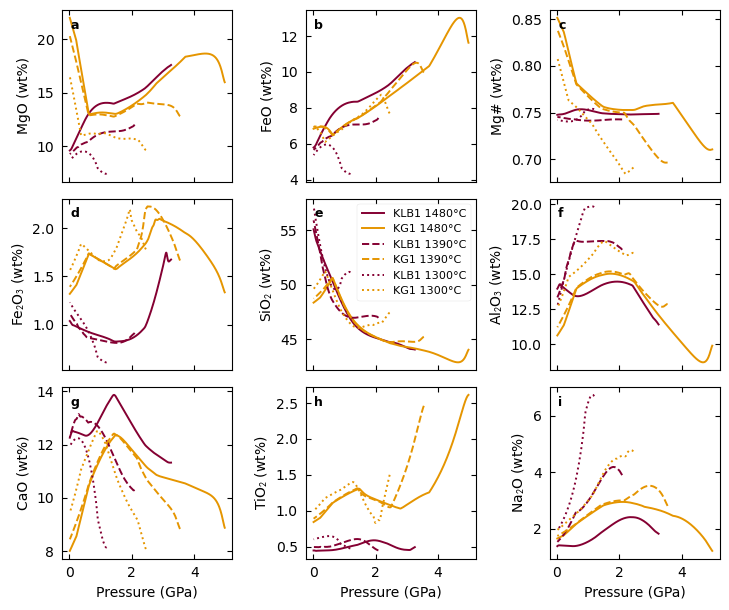

In [393]:
f, a = plt.subplots(3, 3, figsize=(7.4, 6.2), dpi=100, sharex='col')

a = np.ravel(a).tolist()

oxides = ['MgO', 'FeO', 'Mg#', 'Fe2O3', 'SiO2', 'Al2O3', 'CaO', 'TiO2', 'Na2O']

colours1300 = ['#840032', '#840032', '#E59500', '#E59500', '#689689']
oxide_labels = ['MgO', 'FeO', 'Mg#', 'Fe$_2$O$_3$', 'SiO$_2$', 'Al$_2$O$_3$', 'CaO', 'TiO$_2$', 'Na$_2$O']

for i in range(len(oxides)):
    a[i].plot(pxcol1480_tc.P, pxcol1480_tc.lithologies['lz'][oxides[i]], c='#840032', label='KLB1 1480°C')
    a[i].plot(pxcol1480_tc.P, pxcol1480_tc.lithologies['px'][oxides[i]], c='#E59500', label='KG1 1480°C')
    a[i].plot(pxcol1390_tc.P, pxcol1390_tc.lithologies['lz'][oxides[i]], c='#840032', label='KLB1 1390°C', ls='--')
    a[i].plot(pxcol1390_tc.P, pxcol1390_tc.lithologies['px'][oxides[i]], c='#E59500', label='KG1 1390°C', ls='--')
    a[i].plot(pxcol1300_tc.P, pxcol1300_tc.lithologies['lz'][oxides[i]], c='#840032', label='KLB1 1300°C', ls=':')
    a[i].plot(pxcol1300_tc.P, pxcol1300_tc.lithologies['px'][oxides[i]], c='#E59500', label='KG1 1300°C', ls=':')
    a[i].set_ylabel(oxide_labels[i] + ' (wt%)')

for ax in [a[6], a[7], a[8]]:
    ax.set_xlabel('Pressure (GPa)')

f.tight_layout()
    
a[4].legend()

for i in range(len(a)):
    a[i].text(0.05, 0.95, 'abcdefghijklmnopqrstuvwxyz'[i], fontweight='bold',
                transform=a[i].transAxes, ha='left', va='top', fontsize=9)

f.savefig('figures/majors_px.pdf')

plt.show()